In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In this notebook I will analyze the amount of publications on the topic of "***drone detection***" in a public dataset called "***Google Patents***" and make a graph of that data. 

It goes without saying, that by using simple SQL queries I can only achieve certain levels of *accuracy* in finding the right publications. But what I could try to do is make shifts in how strict my queries are in sorting out the right contents. By using more keywords I could get more results for the plot and many of them would be relevant, but the accuracy will definitely decrease. Or I could remove most keywords and get a near certain accuracy, but I would get very few points for my graph, making it less convincing and thus less valuable.

So, as the first step I'm importing a module called BigQueryHelper as was the task:

In [2]:
# Start by importing the bq_helper module and calling on the specific active_project and dataset_name for the BigQuery dataset.

import bq_helper
from bq_helper import BigQueryHelper
# https://www.kaggle.com/sohier/introduction-to-the-bq-helper-package

patents = bq_helper.BigQueryHelper(active_project="patents-public-data",
                                   dataset_name="patents")

Using Kaggle's public dataset BigQuery integration.


Next are the tables in the given data table. We will be working with 'publications', since it contains all the data combined.

In [3]:
# View table names under the patents data table
bq_assistant = BigQueryHelper("patents-public-data", "patents")
bq_assistant.list_tables()

Using Kaggle's public dataset BigQuery integration.


['publications',
 'publications_201710',
 'publications_201802',
 'publications_201809',
 'publications_201903',
 'publications_201909',
 'publications_201912',
 'publications_202004',
 'publications_202007',
 'publications_202101',
 'publications_202105',
 'publications_202111',
 'publications_202204',
 'publications_202208',
 'publications_202212']

To demonstrate how the original data looks, I will request for a few publications from there. I'll also remove restrictions beforehand, because Jupyter Notebook will restrict it to only 20 columns otherwise.

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# View the first three rows of the publications data table
bq_assistant.head("publications", num_rows=3)

,publication_number,application_number,country_code,kind_code,application_kind,application_number_formatted,pct_number,family_id,spif_publication_number,spif_application_number,title_localized,abstract_localized,claims_localized,claims_localized_html,description_localized,description_localized_html,publication_date,filing_date,grant_date,priority_date,priority_claim,inventor,inventor_harmonized,assignee,assignee_harmonized,examiner,uspc,ipc,cpc,fi,fterm,locarno,citation,parent,child,entity_status,art_unit
0,US-8950002-B2,US-201113210213-A,US,B2,A,US13210213,,47713668,US8950002B2,US201113210213,[{'text': 'Method and apparatus for token-base...,"[{'text': 'According to one embodiment, an app...",[{'text': 'What is claimed is: 1...,"[{'text': '<claims mxw-id=""PCLM78904005"" lang=...",[{'text': 'TECHNICAL FIELD This disclosu...,"[{'text': '<description mxw-id=""PDES87198704"" ...",20150203,20110815,20150203,20110815,"[{'publication_number': '', 'application_numbe...","[RADHAKRISHNAN RAKESH, FRICK CYNTHIA ANN, MARI...","[{'name': 'RADHAKRISHNAN RAKESH', 'country_cod...",[Bank Of America Corporation],"[{'name': 'RADHAKRISHNAN RAKESH', 'country_cod...","[{'name': 'Zaidi Syed', 'department': '2493', ...","[{'code': '726/28.', 'inventive': False, 'firs...","[{'code': 'H04L29/06', 'inventive': True, 'fir...","[{'code': 'H04L63/205', 'inventive': False, 'f...",[],[],[],"[{'publication_number': 'US-5634122-A', 'appli...",[],[],large,2493
1,US-8952034-B2,US-84370210-A,US,B2,A,US12843702,,42751632,US8952034B2,US84370210,[{'text': 'Fused heterocyclic compounds as ion...,[{'text': 'The present invention relates to co...,[{'text': 'What is claimed is: 1...,"[{'text': '<claims mxw-id=""PCLM79325239"" lang=...",[{'text': 'CROSS-REFERENCE TO RELATED APPLICAT...,"[{'text': '<description mxw-id=""PDES87619793"" ...",20150210,20100726,20150210,20090727,"[{'publication_number': '', 'application_numbe...","[CORKEY BRITTON, ELZEIN ELFATIH, JIANG ROBERT,...","[{'name': 'CORKEY BRITTON', 'country_code': 'U...","[Gilead Sciences, Inc.]","[{'name': 'CORKEY BRITTON', 'country_code': 'U...","[{'name': 'Ward Paul V.', 'department': '1624'...","[{'code': '514/303.', 'inventive': False, 'fir...","[{'code': 'C07D491/02', 'inventive': True, 'fi...","[{'code': 'A61P9/00', 'inventive': True, 'firs...",[],[],[],"[{'publication_number': 'EP-0017438-A1', 'appl...",[],"[{'publication_number': '', 'application_numbe...",large,1624
2,US-8952295-B2,US-14162108-A,US,B2,A,US12141621,,40888001,US8952295B2,US14162108,[{'text': 'Welding wire with perovskite coatin...,[{'text': 'The electrical resistance between a...,[{'text': 'The invention claimed is: ...,"[{'text': '<claims mxw-id=""PCLM79326652"" lang=...",[{'text': 'BACKGROUND AND SUMMARY Weldin...,"[{'text': '<description mxw-id=""PDES87621206"" ...",20150210,20080618,20150210,20080618,"[{'publication_number': '', 'application_numbe...","[SCHAEFFER J. BEN, CAO SHITONG, KNEISLEY JOEL ...","[{'name': 'SCHAEFFER J BEN', 'country_code': '...","[Lincoln Global, Inc.]","[{'name': 'SCHAEFFER J BEN', 'country_code': '...","[{'name': 'Yuen Henry', 'department': '3742', ...","[{'code': '219/145.22', 'inventive': False, 'f...","[{'code': 'B23K35/365', 'inventive': True, 'fi...","[{'code': 'B23K35/404', 'inventive': True, 'fi...",[],[],[],"[{'publication_number': 'GB-502823-A', 'applic...",[],[],large,3742


As a sidenote I'll demonstrate all the columns in the database. Altough it's important, it doesn't really affect the topic of my research.

In [5]:
# View information on all columns in the publications data table
bq_assistant.table_schema("publications")

/src/bq-helper/bq_helper.py:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  'fields': pd.np.nan,


,name,type,mode,description
0,publication_number,STRING,NULLABLE,"Patent publication number (DOCDB compatible), ..."
1,application_number,STRING,NULLABLE,"Patent application number (DOCDB compatible), ..."
2,country_code,STRING,NULLABLE,"Country code, eg: 'US', 'EP', etc"
3,kind_code,STRING,NULLABLE,"Kind code, indicating application, grant, sear..."
4,application_kind,STRING,NULLABLE,High-level kind of the application: A=patent; ...
5,application_number_formatted,STRING,NULLABLE,"Application number, formatted to the patent of..."
6,pct_number,STRING,NULLABLE,PCT number for this application if it was part...
7,family_id,STRING,NULLABLE,Family ID (simple family). Grouping on family ...
8,spif_publication_number,STRING,NULLABLE,"SPIF standard (spif.group) publication number,..."
9,spif_application_number,STRING,NULLABLE,"SPIF standard (spif.group) application number,..."


Then I will write a SQL query which will return publications with the required keywords in them. I used two groups of synonyms, one group for each word in "drone detection", so a combination like "unmanned aircraft identification" would be found by the query. The more keywords I add, the more results it will give, but at the cost of there being wrong publications mixed in. I could also add more places to be searched, but in this particular query I'm only going through the titles and abstracts of the publications. It's only logical that if nothing about drone detection is remotely mentioned in the title and brief description, then it's highly unlikely that the article is on that topic.

The things I'm requesting are self-explanatory. For the purposes of estimating accuracy I'm requesting the "title_localized" field, which is a "ARRAY<STRUCT<text string, language string, truncated boolean>>" type. Basically, an array of structures, each of them containing a different localization of the publication's title - could be in English, Chinese or any other language. It could also be called a Nested Table, which is why I'm using the UNNEST command. It makes a table from a given array, then I'm selecting every localized text there was in this column and checking it for the keywords that I've set up. I could also make another table for the keywords, but there isn't much time left to hand in the task. I could change it upon a request, though. So, if there is a localized text that fits the bill, the publication proceeds to the local dataframe which I subsequently name "dataframe". I know, I'm very creative. Then I'm doing exactly the same thing to the "abstract_localized" field, which, I should mention, has exactly the same structure.

After that I'm making the actual SQL query using the aforementioned bq_helper module and showing 10 rows from the results.

In [6]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
query = """
SELECT publication_number,
title_localized,
publication_date,
FROM
  `patents-public-data.patents.publications`
WHERE EXISTS(
    SELECT text
    FROM UNNEST(title_localized)
    WHERE (
      (text LIKE '% drone%' OR
      text LIKE '%Drone%' OR
      text LIKE '%unmanned%' OR
      text LIKE '%Unmanned%') AND
      (text LIKE '%detect%' OR
      text LIKE '%Detect%' OR
      text LIKE '%identif%' OR
      text LIKE '%Identif%' OR
      text LIKE '%Spot%' OR
      text LIKE '%spot%')
    )
) OR EXISTS(
    SELECT text
    FROM UNNEST(abstract_localized)
    WHERE (
      (text LIKE '% drone%' OR
      text LIKE '%Drone%' OR
      text LIKE '%unmanned%' OR
      text LIKE '%Unmanned%') AND
      (text LIKE '%detect%' OR
      text LIKE '%Detect%' OR
      text LIKE '%identif%' OR
      text LIKE '%Identif%' OR
      text LIKE '%Spot%' OR
      text LIKE '%spot%')
    )
);
        """
dataframe = patents.query_to_pandas_safe(query, max_gb_scanned=170)
dataframe

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,publication_number,title_localized,publication_date
0,WO-2022033098-A1,"[{'text': '一种基于无人机的水稻冠层温度检测方法', 'language': 'z...",20220217
1,WO-2018046124-A1,[{'text': 'Véhicule doté d&#39;une fonctionnal...,20180315
2,WO-2018121247-A1,"[{'text': '控制无人机飞行的方法、装置以及无人机', 'language': 'z...",20180705
3,WO-2013111319-A1,"[{'text': '無人電気所遠隔監視制御装置用再立上げ装置および方法', 'langua...",20130801
4,WO-2012077911-A3,"[{'text': '공작기계의 공구 손상 탐지장치 및 공구손상 탐지방법', 'lan...",20120823
...,...,...,...
45698,CN-202824031-U,"[{'text': '宝特瓶粉碎机的清洗结构', 'language': 'zh', 'tr...",20130327
45699,CN-203720977-U,"[{'text': '无人值守综合探测系统', 'language': 'zh', 'tru...",20140716
45700,CN-203767529-U,"[{'text': '原料厂多料仓小车卸料自动控制系统', 'language': 'zh'...",20140813
45701,CN-205450697-U,"[{'text': '一种异物入侵安全防控装置', 'language': 'zh', 't...",20160810


Interesting results. 9 of the 10 displayed results are in Chinese, Korean or something along those lines. 1 of them is French. Apparently, they all still have english localizations. It would be nice if the results were accurate, but, unfortunately, they aren't. There are many patents about drones being used to do something remotely and since all drones have the function of identifying what's around them, having the keyword "identifying" is detrimental to overall accuracy. But that is only in the case of checking the abstract from the publication. It would probably be much better to only check the titles of these publications. The results would most likely be more accurate, but also more scarce. We won't know if it is better until we try it, but that will be a bit later - for now I will demonstrate how to make a quarterly graph out of the resulting dataframe.

First, I'm converting original data to a different format, so that Pandas can use it in it's functions.

In [7]:
dataframe.drop(dataframe[dataframe['publication_date'] == 0].index, inplace = True)
# Just fixing an error in the database. One of the publications somehow had "0" as a publication date.
# Even though the number of lines didn't change, this fixed my issue.
dataframe['publication_date'] = pd.to_datetime(dataframe['publication_date'], format = '%Y%m%d')
dataframe['publication_date']

0       2022-02-17
1       2018-03-15
2       2018-07-05
3       2013-08-01
4       2012-08-23
           ...    
45698   2013-03-27
45699   2014-07-16
45700   2014-08-13
45701   2016-08-10
45702   2016-09-07
Name: publication_date, Length: 45702, dtype: datetime64[ns]

Then I'm running lots of tedious Python code. This is one of the main parts of the task, so I'll cover it, but I'm not proud of the code I've written. I just had to do it quickly, so I even imported a module, because it would otherwise take me possibly several hours to find a fitting solution within already connected modules. 

So, firstly, it converts the timedate type "publication_date" data into quarterly dates, all saved in a new column called "quarter". Then I'm making a new column called "quarters" converting the quarterly dates from the previous column into strings. 

In [8]:
dataframe['quarter'] = dataframe['publication_date'].dt.to_period('Q')
dataframe['quarters'] = dataframe['quarter'].astype(str)
dataframe

,publication_number,title_localized,publication_date,quarter,quarters
0,WO-2022033098-A1,"[{'text': '一种基于无人机的水稻冠层温度检测方法', 'language': 'z...",2022-02-17,2022Q1,2022Q1
1,WO-2018046124-A1,[{'text': 'Véhicule doté d&#39;une fonctionnal...,2018-03-15,2018Q1,2018Q1
2,WO-2018121247-A1,"[{'text': '控制无人机飞行的方法、装置以及无人机', 'language': 'z...",2018-07-05,2018Q3,2018Q3
3,WO-2013111319-A1,"[{'text': '無人電気所遠隔監視制御装置用再立上げ装置および方法', 'langua...",2013-08-01,2013Q3,2013Q3
4,WO-2012077911-A3,"[{'text': '공작기계의 공구 손상 탐지장치 및 공구손상 탐지방법', 'lan...",2012-08-23,2012Q3,2012Q3
...,...,...,...,...,...
45698,CN-202824031-U,"[{'text': '宝特瓶粉碎机的清洗结构', 'language': 'zh', 'tr...",2013-03-27,2013Q1,2013Q1
45699,CN-203720977-U,"[{'text': '无人值守综合探测系统', 'language': 'zh', 'tru...",2014-07-16,2014Q3,2014Q3
45700,CN-203767529-U,"[{'text': '原料厂多料仓小车卸料自动控制系统', 'language': 'zh'...",2014-08-13,2014Q3,2014Q3
45701,CN-205450697-U,"[{'text': '一种异物入侵安全防控装置', 'language': 'zh', 't...",2016-08-10,2016Q3,2016Q3


After that I import "Counter" module, so that I could easily count the amount of times each quarter is encountered in the "publications_date" column. Then, I get the data into arrays, which are then sorted with sorted() and zip() function.(both are built-in for python) Finally, I'm converting the data into datetime format from Pandas. It's used to get a good plot - otherwise the dates on the x axis would be just normal string and would overlap with each other, making it impossible to read anything.

In [9]:
from collections import Counter
result = Counter(dataframe['quarters'])

print("There are", len(result), "quarters with patents.")

time = []
amount = []
for item in result:
    time.append(item)
    amount.append(result[item])
time, amount = zip(*sorted(zip(time, amount)))
print(time)
print(amount)
date = []
for i in range(len(time)):
    date += [time[i][:4] + "-" + str((int(time[i][5]))*3-2) + "-1"]
dates = pd.to_datetime(date)

There are 193 quarters with patents.
('1964Q2', '1970Q2', '1971Q2', '1972Q1', '1973Q2', '1973Q3', '1975Q2', '1975Q3', '1976Q1', '1976Q3', '1977Q1', '1977Q2', '1977Q4', '1978Q1', '1978Q3', '1978Q4', '1979Q1', '1979Q2', '1979Q3', '1979Q4', '1980Q1', '1980Q2', '1980Q3', '1980Q4', '1981Q1', '1981Q2', '1981Q3', '1981Q4', '1982Q1', '1982Q2', '1982Q3', '1982Q4', '1983Q1', '1983Q2', '1983Q3', '1983Q4', '1984Q1', '1984Q2', '1984Q3', '1984Q4', '1985Q1', '1985Q2', '1985Q3', '1985Q4', '1986Q1', '1986Q2', '1986Q3', '1986Q4', '1987Q1', '1987Q2', '1987Q3', '1987Q4', '1988Q1', '1988Q2', '1988Q3', '1988Q4', '1989Q1', '1989Q2', '1989Q3', '1989Q4', '1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2', '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4', '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2', '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4', '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2', '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4', '1

Finally, after processing all that data, everything is ready for the resulting plot. I won't get into details on how to use MatPlotLib, since this plot is just a few lines of code. Each point on the graph represents a quarter when there was *at least one* publication on our topic.

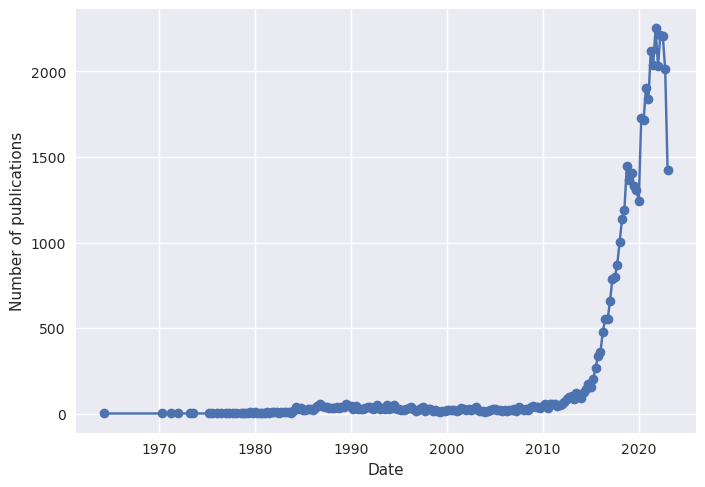

In [10]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.pyplot as plt # plotting plots
plt.style.use('seaborn')
plt.plot_date(dates, amount, linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Number of publications')
plt.show()

It's pretty easy to look closer at the latest trend, let's do just that.

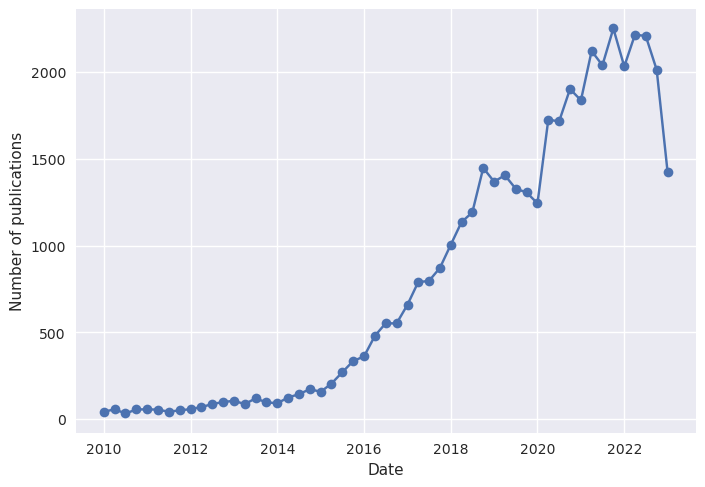

In [11]:
plt.plot_date(dates[140:], amount[140:], linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Number of publications')
plt.show()

We can see exponential growth on the graph. We could look more closely, actually.

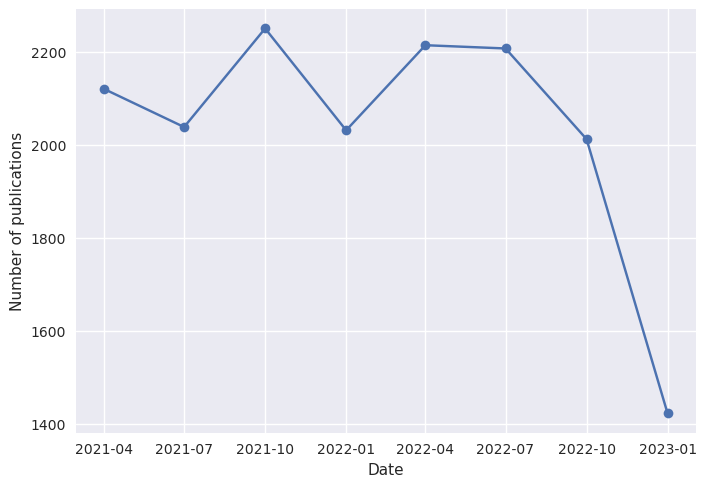

In [12]:
plt.plot_date(dates[185:], amount[185:], linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Number of publications')
plt.show()

Here it becomes clear that my data is actually split quarterly. Of course, the last quarter can't be taken too seriously - maybe some data can't be added instantly or the "Google Patents" database isn't updated that often. Actually, the graph is going down lately, no exponential growth and not even linear growth. I wonder if it's because of the recent tensions between China and the US, seeing how a lot of publications are from China.

These were the graphs for our more lenient search terms. Here I will do the same code with a more strict SQL query to see if checking only titles will have an improvement to overall accuracy and if the graph will change or not.

In [13]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
query2 = """
SELECT publication_number,
title_localized,
publication_date,
FROM
  `patents-public-data.patents.publications`
WHERE EXISTS(
    SELECT text
    FROM UNNEST(title_localized)
    WHERE (
      (text LIKE '% drone%' OR
      text LIKE '%Drone%' OR
      text LIKE '%unmanned%' OR
      text LIKE '%Unmanned%') AND
      (text LIKE '%detect%' OR
      text LIKE '%Detect%' OR
      text LIKE '%identif%' OR
      text LIKE '%Identif%' OR
      text LIKE '%Spot%' OR
      text LIKE '%spot%')
    )
);
        """
dataframe2 = patents.query_to_pandas_safe(query2, max_gb_scanned=17)
dataframe2['publication_date'] = pd.to_datetime(dataframe2['publication_date'], format = '%Y%m%d')
dataframe2['quarter'] = dataframe2['publication_date'].dt.to_period('Q')
dataframe2

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,publication_number,title_localized,publication_date,quarter
0,WO-2017097596-A2,[{'text': 'Verfahren und steuergerät zum erken...,2017-06-15,2017Q2
1,WO-2020082366-A1,"[{'text': '电力线路检测方法、装置、无人机及计算机可读存储介质', 'langua...",2020-04-30,2020Q2
2,WO-2019174255-A1,[{'text': 'Method and apparatus for detecting ...,2019-09-19,2019Q3
3,WO-2018020965-A1,"[{'text': '無人飛行体検知システム及び無人飛行体検知方法', 'language'...",2018-02-01,2018Q1
4,RU-2745658-C2,[{'text': 'Method and device for detecting rad...,2021-03-30,2021Q1
...,...,...,...,...
7444,WO-2020191937-A1,"[{'text': '用于机械结构件检测的无人机', 'language': 'zh', '...",2020-10-01,2020Q4
7445,WO-2022082843-A1,"[{'text': '一种多传感器融合的无人车探测避障系统及避障方法', 'language...",2022-04-28,2022Q2
7446,WO-2022021028-A1,"[{'text': '目标检测方法、装置、无人机及计算机可读存储介质', 'language...",2022-02-03,2022Q1
7447,WO-2017219469-A1,"[{'text': '无人船船体中裂缝扩展的超声探测器', 'language': 'zh'...",2017-12-28,2017Q4


In [14]:
dataframe2['quarters'] = dataframe2['quarter'].astype(str)
result2 = Counter(dataframe2['quarters'])

print("There are", len(result2), "quarters with patents.")

time2 = []
amount2 = []
for item in result2:
    time2.append(item)
    amount2.append(result2[item])
time2, amount2 = zip(*sorted(zip(time2, amount2)))
print(time2)
print(amount2)
date2 = []
for i in range(len(time2)):
    date2 += [time2[i][:4] + "-" + str((int(time2[i][5]))*3-2) + "-1"]
dates2 = pd.to_datetime(date2)

There are 142 quarters with patents.
('1977Q1', '1977Q2', '1978Q1', '1978Q4', '1979Q1', '1979Q2', '1979Q3', '1980Q1', '1981Q1', '1982Q2', '1983Q1', '1983Q2', '1983Q3', '1984Q2', '1984Q3', '1984Q4', '1985Q1', '1985Q2', '1985Q3', '1985Q4', '1986Q1', '1986Q2', '1986Q3', '1986Q4', '1987Q1', '1987Q2', '1987Q3', '1987Q4', '1988Q2', '1988Q3', '1988Q4', '1989Q1', '1989Q2', '1989Q3', '1989Q4', '1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q3', '1991Q4', '1992Q1', '1992Q3', '1992Q4', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2', '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q4', '1996Q1', '1996Q2', '1996Q3', '1997Q2', '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1999Q2', '1999Q3', '2000Q1', '2000Q2', '2000Q3', '2000Q4', '2001Q1', '2001Q3', '2001Q4', '2002Q1', '2002Q2', '2002Q3', '2003Q1', '2003Q2', '2003Q3', '2003Q4', '2004Q3', '2005Q4', '2006Q3', '2007Q3', '2007Q4', '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q3', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2

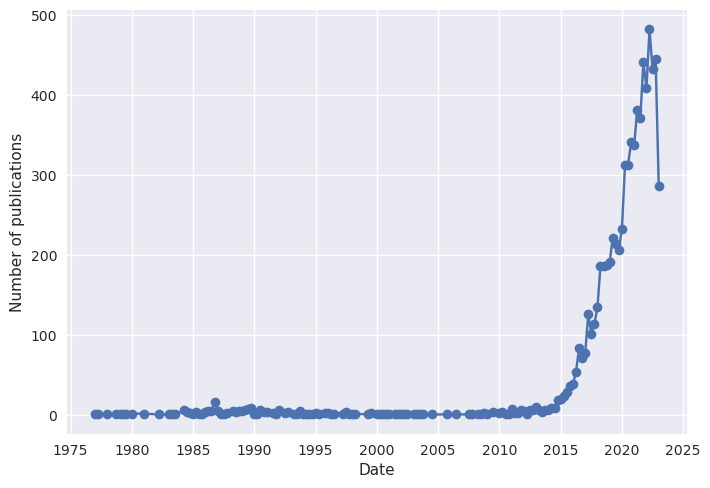

In [15]:
plt.plot_date(dates2, amount2, linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Number of publications')
plt.show()

So far, it looks like it's not as random as the previous one. Let's take a look from about 2012 when the quick growth just begins.

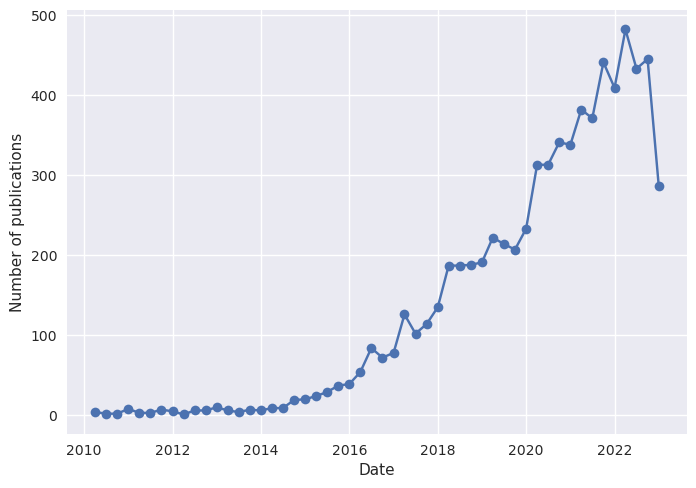

In [16]:
plt.plot_date(dates2[90:], amount2[90:], linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Number of publications')
plt.show()

This graph is much steadier than for the other query. A beautiful exponential growth. Except for the last quarter, obviously.

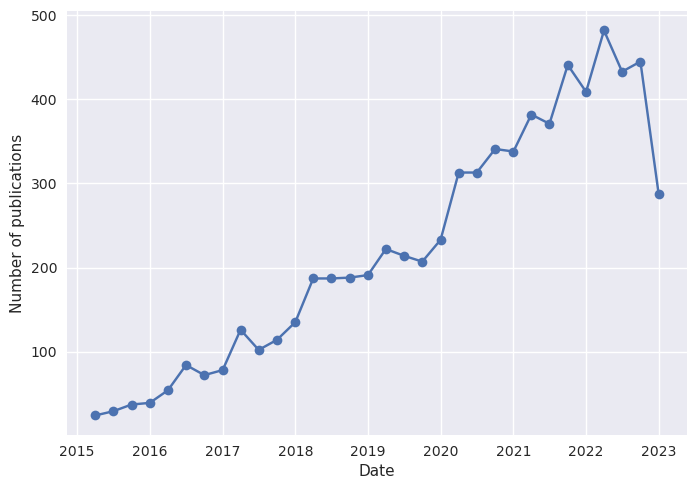

In [17]:
plt.plot_date(dates2[110:], amount2[110:], linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Number of publications')
plt.show()

From 2015 growth start to look linear - maybe that means we picked a rather short time period, even though it was the most meaningful for the growth of our topic.

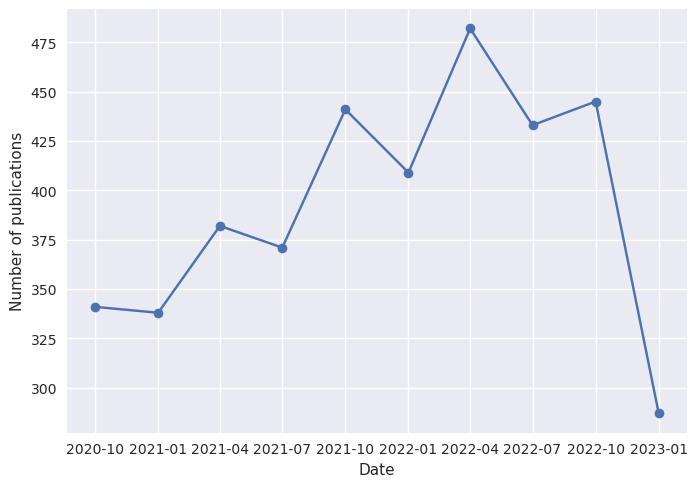

In [18]:
plt.plot_date(dates2[132:], amount2[132:], linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Number of publications')
plt.show()

Here we can observe the latest trend of drone detection publications.

As a conclusion, I'd like to point out that the latest trend for "higher-accuracy search terms" results is a steady and rather fast growth while the result for the other query was stagnation. This actually shows that accuracy of the search terms could mean a lot - we got a very different result just from that. So, if we were asked to learn whether this topic is growing in relevance or not the answers would have been opposites to each other.